### DBSCAN  (Density Based Spatial Clustering of  Application with Noise)

#### Drawbacks
***KMean:*** Considers the outliers. So there is no mechanism to detect the outliers in KMeans.

##### DBSCAN has the mechanism to detect the outliers.
DBSCAN requires 2 parameters:
- Epsilon
- Minipoints

***Epsilon:*** Radius of the circles which is created or drawn for every data points

***Minipoints:*** Identifies core points, Border/Boundary Points, Noise.
   
- ```Core Points:``` A circle in which the data points should have atleast mini points or more than mini points in it
    - If two core points say C1 and C2 comes in the same epsilon neighborhood, then we have a `density edge` connecting those and its called, ***Density Connected***
    - If suppose, C1,C2,C3,C4 are conected, ie, C1 is connected to C2, C2 to C3, C3 to C4 then we can say C1 and C2 are directly Density Connected and C1 and C4 is indirectly reachable and hence density connected points.

- ```Border Points:``` Has less points than the core point, contains atleast 1 Core Point and should be > 1

- ```Noise Points:``` No core or border points in the circle

### Steps
- Give Epsilon and Minpoints
- Find out core points and border points and Noise Points.
- After identifying the points, we have to connect the core points to form the clusters. (checks if its in the epsilon neighborhood and if it is, then its connected by the density edge)
- After forming the clusters, it assigns labels to the density clusters. (Based on the nearest core point's label, the border points are also labelled.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("mall.csv", index_col = "CustomerID")

In [5]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
df["Genre"] = df["Genre"].map({"Male":1, "Female":0})

In [7]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


##### Minimum Points/Sample  = Dimension + 1 = 4+1 = 5

In [8]:
# kdsitance plot for epsilon
from sklearn.neighbors import NearestNeighbors

In [9]:
n = NearestNeighbors(n_neighbors = 2) #taking two neighbors as we want distance between 2 neighbors.
n_fit = n.fit(df)
distance,index = n_fit.kneighbors(df)

In [12]:
distance = np.sort(distance, axis = 0)

In [13]:
distance = distance[:,1]

In [16]:
distance

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.73205081,
        1.73205081,  2.        ,  2.        ,  2.23606798,  2.23606798,
        2.23606798,  2.23606798,  2.23606798,  2.23606798,  2.44948974,
        2.44948974,  2.44948974,  2.44948974,  2.44948974,  2.64575131,
        2.64575131,  2.64575131,  2.64575131,  3.        ,  3.        ,
        3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
        3.        ,  3.16227766,  3.16227766,  3.16227766,  3.16227766,
        3.31662479,  3.31662479,  3.46410162,  3.46410162,  3.46410162,
        3.60555128,  3.60555128,  3.60555128,  3.74165739,  3.74165739,
        3.74165739,  3.74165739,  3.74165739,  3.74165739,  3.74165739,
        3.74165739,  3.74165739,  3.74165739,  3.87298335,  3.87298335,
        4.12310563,  4.12310563,  4.12310563,  4.24264069,  4.24264069,
        4.24264069,  4.24264069,  4.24264069,  4.24264069,  4.24264069,
        4.24264069,  4.24264069,  4.35889894,  4.35889894,  4.35

Text(0.5, 0, 'Distance')

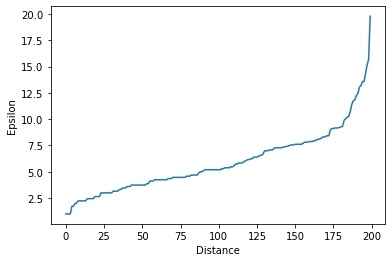

In [19]:
plt.plot(distance)
plt.ylabel("Epsilon")
plt.xlabel("Distance")

In [21]:
# The point we getting the elbow is taken as epsilon value. In our case, let's  take it as 9. Epsilon = 9

from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 9, min_samples = 5)
model.fit(df)


DBSCAN(eps=9)

In [23]:
model.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  2,  1, -1, -1,  2,  1,  1,  1,  2,
        1,  1,  2,  2,  2,  2,  2,  1,  2,  2,  1,  2,  2,  2,  1,  2,  2,
        1,  1,  2,  2,  2,  2,  2,  1,  2,  2,  1,  2,  2,  2, -1,  2,  1,
        2,  2,  1, -1,  2,  3,  1,  2,  2,  2,  1,  2,  1,  2,  1,  1,  2,
        3,  1,  2,  1,  3,  2,  3,  3,  3,  1,  2,  1,  1,  1,  3,  2,  2,
        2,  1,  2, -1, -1, -1,  4, -1, -1, -1,  4, -1,  4, -1,  4, -1,  4,
       -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,
        4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1, -1,
       -1, -1, -1,  4, -1,  4, -1, -1, -1,  4, -1,  4, -1,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [25]:
x = df[["Annual_Income_(k$)","Spending_Score"]]

Text(0.5, 0, 'Distance')

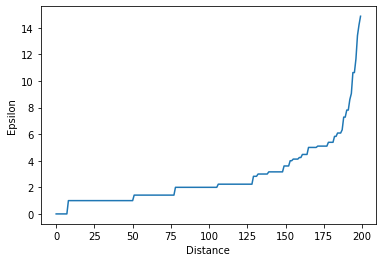

In [28]:
n = NearestNeighbors(n_neighbors = 2)
n_fit = n.fit(x)
distance,index = n_fit.kneighbors(x)
distance = np.sort(distance, axis = 0)
distance = distance[:,1]
plt.plot(distance)
plt.ylabel("Epsilon")
plt.xlabel("Distance")

In [33]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps =5, min_samples = 3)
model.fit(x)
model.labels_

array([-1,  1,  0,  1, -1,  1,  0, -1,  0,  1,  2, -1,  2,  1,  2,  1,  3,
       -1, -1, -1,  3,  4, -1,  4,  5, -1,  3, -1,  3, -1, -1,  4, -1, -1,
        5, -1,  5,  4, -1,  4, -1, -1, -1,  6, -1,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7, -1,  8, -1,  7,  9,  8,  9,  8, -1,  8,  9,  7,
        9,  8,  9,  8,  9,  7, 10,  7,  9,  7, 10,  8,  9,  7,  9,  7,  9,
        8,  9,  7,  9,  8,  9,  8, 10,  7,  9,  7, -1, -1, -1, -1, -1, -1,
       11, -1, 11, -1, 11, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

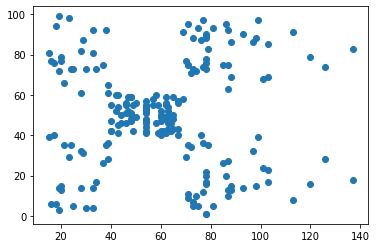

In [34]:
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"])

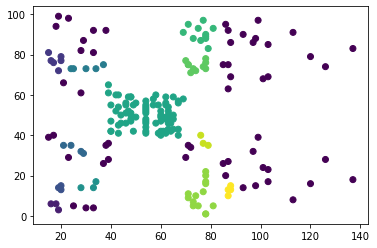

In [35]:
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"], c =  model.labels_)